<a href="https://colab.research.google.com/github/Anavi07/AudioSpotting/blob/main/FSDD_GoogLeNet_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# Paths
main_dir = '/content/free-spoken-digit-dataset'  # Path to FSDD
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

if not os.path.exists(files_path):
    os.makedirs(files_path)

# Clone the dataset if not already cloned
if not os.path.exists(main_dir):
    !git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git


Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212 (from 1)
Receiving objects: 100% (4260/4260), 30.38 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [4]:
# PROCESSING
# Feature extraction methods

# def CalculateZeroCrossingRate(file_location):
#     y, sr = librosa.load(file_location)
#     zCross = librosa.feature.zero_crossing_rate(y=y)
#     dim = (32, 32)
#     resized = cv2.resize(zCross, dim, interpolation = cv2.INTER_AREA)
#     return resized

def CalculateMelSpectrogram(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.melspectrogram(y=y, sr=sr)
    melSpec_dB = librosa.power_to_db(melSpec)
    dim = (32, 32)
    resized = cv2.resize(melSpec_dB, dim, interpolation = cv2.INTER_AREA)
    return resized


def CalculateMFCC(file_location):
    y, sr = librosa.load(file_location)
    melSpec = librosa.feature.mfcc(y=y, sr=sr)
    dim = (32, 32)
    resized = cv2.resize(melSpec, dim, interpolation = cv2.INTER_AREA)
    return resized



In [5]:
cd /content

/content


In [6]:
'''for i in range(10):
  j = '/content/dataset'
  print(os.listdir(j))
  for k in os.listdir(j):
    print(k)
    if ".DS_" in k:
      continue

    for t in os.listdir(j+"/"+k):
      #print("path = ", os.listdir(j+"/"+k))
      if ".DS_" in k:
        continue
      print(t.split("WA")[1].split(".")[0])
      #print(t.split("D")[1][0])
      break
    break
  break '''

'for i in range(10):\n  j = \'/content/dataset\'\n  print(os.listdir(j))\n  for k in os.listdir(j):\n    print(k)\n    if ".DS_" in k:\n      continue\n\n    for t in os.listdir(j+"/"+k):\n      #print("path = ", os.listdir(j+"/"+k))\n      if ".DS_" in k:\n        continue\n      print(t.split("WA")[1].split(".")[0])\n      #print(t.split("D")[1][0])\n      break\n    break\n  break '

In [7]:
# Paths
main_dir = '/content/free-spoken-digit-dataset'  # Path to the main dataset folder
recordings_dir = os.path.join(main_dir, 'recordings')  # Path to the 'recordings' folder
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

if not os.path.exists(files_path):
    os.makedirs(files_path)

# Processing
x = []
y = []

# Loop through the 'recordings' folder
for file_name in os.listdir(recordings_dir):
    if not file_name.endswith('.wav'):
        continue

    file_path = os.path.join(recordings_dir, file_name)

    try:
        # Extract Mel Spectrogram features
        x.append(CalculateMelSpectrogram(file_path))

        # Extract label from the file name (e.g., "0_george_0001.wav" -> label = 0)
        label = int(file_name.split('_')[0])
        y.append(label)
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Convert to NumPy arrays
x = np.array(x)
y = np.array(y)

# Verify data
if x.size == 0 or y.size == 0:
    raise ValueError("No data was processed. Check dataset structure and feature extraction.")

# Save processed data
np.save(os.path.join(files_path, "X_melspectrogram.npy"), x)
np.save(os.path.join(files_path, "Y_melspectrogram.npy"), y)

print(f"Processing completed. Processed data saved in {files_path}.")

Processing completed. Processed data saved in /content/drive/MyDrive/processed_data/fsdd.


In [ ]:
# Paths
main_dir = '/content/free-spoken-digit-dataset'  # Path to the main dataset folder
recordings_dir = os.path.join(main_dir, 'recordings')  # Path to the 'recordings' folder
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

if not os.path.exists(files_path):
    os.makedirs(files_path)

# Processing
x = []
y = []

# Loop through the 'recordings' folder
for file_name in os.listdir(recordings_dir):
    if not file_name.endswith('.wav'):
        continue

    file_path = os.path.join(recordings_dir, file_name)

    try:
        # Extract Mel Spectrogram features
        x.append(CalculateMFCC(file_path))

        # Extract label from the file name (e.g., "0_george_0001.wav" -> label = 0)
        label = int(file_name.split('_')[0])
        y.append(label)
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Convert to NumPy arrays
x = np.array(x)
y = np.array(y)

# Verify data
if x.size == 0 or y.size == 0:
    raise ValueError("No data was processed. Check dataset structure and feature extraction.")

# Save processed data
np.save(os.path.join(files_path, "X_mfcc.npy"), x)
np.save(os.path.join(files_path, "Y_mfcc.npy"), y)

print(f"Processing completed. Processed data saved in {files_path}.")

Processing completed. Processed data saved in /content/drive/MyDrive/processed_data/fsdd.


In [8]:
#load files
files_path = '/content/drive/MyDrive/processed_data/fsdd'  # Save processed data

x_melspectrogram = np.load(files_path+"/X_melspectrogram.npy", allow_pickle=True)
# x_zero_crossing_rate = np.load(files_path+"/X_zero_crossing_rate.npy", allow_pickle=True)
#x_mfcc = np.load(files_path+"/X_mfcc.npy", allow_pickle=True)
y_melspectrogram = np.load(files_path+"/Y_melspectrogram.npy", allow_pickle=True)
# y_zero_crossing_rate = np.load(files_path+"/y_zero_crossing_rate.npy", allow_pickle=True)
#y_mfcc = np.load(files_path+"/Y_mfcc.npy", allow_pickle=True)

In [ ]:
# #Split data into train and test

# from sklearn.model_selection import train_test_split
# x = x_mfcc
# y = y_mfcc

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_mfcc_train",x_train)
# np.save(files_path+"/y_mfcc_train",y_train)
# np.save(files_path+"/x_mfcc_test",x_test)
# np.save(files_path+"/y_mfcc_test",y_test)

In [9]:
from sklearn.model_selection import train_test_split
x = x_melspectrogram
y = y_melspectrogram

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
np.save(files_path+"/x_melspectrogram_train",x_train)
np.save(files_path+"/y_melspectrogram_train",y_train)
np.save(files_path+"/x_melspectrogram_test",x_test)
np.save(files_path+"/y_melspectrogram_test",y_test)

In [ ]:

# from sklearn.model_selection import train_test_split
# x = x_zero_crossing_rate
# y = y_zero_crossing_rate

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# np.save(files_path+"/x_zero_crossing_rate_train",x_train)
# np.save(files_path+"/y_zero_crossing_rate_train",y_train)
# np.save(files_path+"/x_zero_crossing_rate_test",x_test)
# np.save(files_path+"/y_zero_crossing_rate_test",y_test)

In [10]:
import tensorflow as tf
import numpy as np

files_path = '/content/drive/MyDrive/processed_data/audd'

features = ['melspectrogram', 'mfcc', 'zero_crossing_rate']

x_train = np.load(files_path+"/x_{}_train.npy".format(features[0]), allow_pickle=True)
y_train = np.load(files_path+"/y_{}_train.npy".format(features[0]), allow_pickle=True)

x_test = np.load(files_path+"/x_{}_test.npy".format(features[0]),allow_pickle=True)
y_test = np.load(files_path+"/y_{}_test.npy".format(features[0]),allow_pickle=True)

In [11]:
print(np.unique(y_melspectrogram))

[0 1 2 3 4 5 6 7 8 9]


In [12]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))

In [13]:
x_train = x_train.reshape(-1, 32, 32, 1)  # Reshape to match the input shape of the model
x_test = x_test.reshape(-1, 32, 32, 1)    # Reshape for testing
train_y = tf.keras.utils.to_categorical(y_train, num_classes=10)  # One-hot encode
test_y = tf.keras.utils.to_categorical(y_test, num_classes=10)    # One-hot encode


In [14]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)


Shape of x_train: (1552, 32, 32, 1)
Shape of x_test: (388, 32, 32, 1)


In [16]:
print("Min value in x_train:", x_train.min())
print("Max value in x_train:", x_train.max())


Min value in x_train: 0.0
Max value in x_train: 1.0


In [15]:
# Normalize x_train and x_test to the range [0, 1]
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())


## Train Model

In [17]:
#GoogleNet
import tensorflow as tf
from tensorflow.keras import layers, models

# Define GoogleNet (Inception) model for audio data
def GetGoogleNet(input_shape=(32, 32, 1)):
    # Input layer
    input_layer = layers.Input(shape=input_shape)

    # Convert 1-channel input to 3-channel (required for pretrained models)
    x = layers.Conv2D(3, (1, 1), activation='relu')(input_layer)

    # Inception Block 1
    tower_1 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    tower_1 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

    tower_2 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    tower_2 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    tower_3 = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

    x = layers.concatenate([tower_1, tower_2, tower_3], axis=-1)

    # Inception Block 2
    tower_1 = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    tower_1 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(tower_1)

    tower_2 = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    tower_2 = layers.Conv2D(128, (5, 5), padding='same', activation='relu')(tower_2)

    tower_3 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    tower_3 = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(tower_3)

    x = layers.concatenate([tower_1, tower_2, tower_3], axis=-1)

    # Add Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layers
    x = layers.Dropout(0.5)(x)  # Regularization
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)  # Regularization
    output_layer = layers.Dense(10, activation='softmax')(x)  # Output layer for 10 classes

    # Define the model
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Preprocess the audio data (assumed to be Mel Spectrograms)
# x_train and x_test must be 2D arrays representing audio features
x_train = x_train.reshape(-1, 32, 32, 1)  # Reshape to match input shape
x_test = x_test.reshape(-1, 32, 32, 1)    # Same for test data

# Normalize the audio data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels for 10-class classification
train_y = tf.keras.utils.to_categorical(y_train, num_classes=10)
test_y = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Compile the GoogleNet model
googlenet_model = GetGoogleNet(input_shape=(32, 32, 1))
googlenet_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)  # Lower learning rate
)

# Define callback for saving the best model
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/auddsavedfiles/models/googlenet_model_audio.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model
history = googlenet_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

# Evaluate the model on test data
test_accuracy = googlenet_model.evaluate(x_test, test_y)
print("Test Accuracy is", test_accuracy[1])


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.2139 - loss: 2.2971
Epoch 1: val_accuracy improved from -inf to 0.22436, saving model to /content/drive/MyDrive/auddsavedfiles/models/googlenet_model_audio.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 626ms/step - accuracy: 0.2155 - loss: 2.2969 - val_accuracy: 0.2244 - val_loss: 2.2789
Epoch 2/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2859 - loss: 2.2739
Epoch 2: val_accuracy did not improve from 0.22436
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2837 - loss: 2.2735 - val_accuracy: 0.2244 - val_loss: 2.2557
Epoch 3/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2604 - loss: 2.2523
Epoch 3: val_accuracy did not improve from 0.22436
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2605 - loss: 2.2518 - val_accuracy: 0.2244 - val_loss: 2.2333
Epoch 4/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2762 - loss: 2.2301
Epoch 4: val_accuracy did not improve from 0.22436
22/22 ━━━━━━━━

In [18]:
#GoogleNet Accuracy
# Load the saved model
from tensorflow.keras.models import load_model
googlenet_model = load_model('/content/drive/MyDrive/auddsavedfiles/models/googlenet_model_audio.keras')

# Evaluate the model
test_accuracy = googlenet_model.evaluate(x_test, test_y)
print("Test Accuracy is", test_accuracy[1])


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2494 - loss: 2.2801
Test Accuracy is 0.26030927896499634


In [ ]:
# Evaluate the EfficientNet model
efficientnet_model = tf.keras.models.load_model('/content/drive/MyDrive/auddsavedfiles/models/efficientnet_model_audio.keras')
print("Test Accuracy is ", efficientnet_model.evaluate(x_test, test_y)[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 369ms/step - accuracy: 0.2710 - loss: 1.9839
Test Accuracy is  0.27319586277008057


In [ ]:
#AlexNet
import tensorflow as tf
from tensorflow.keras import layers, models

# Define AlexNet model
def GetAlexNet():
    model = models.Sequential()

    # Layer 1: Convolutional + MaxPooling
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 1), padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Layer 2: Convolutional + MaxPooling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Layer 3: Convolutional
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))

    # Layer 4: Convolutional
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))

    # Layer 5: Convolutional + MaxPooling
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  # For 10 classes

    return model

# Preprocess data
x_train = x_train.reshape(-1, 32, 32, 1)  # Reshape to match input shape
x_test = x_test.reshape(-1, 32, 32, 1)    # Reshape for testing
train_y = tf.keras.utils.to_categorical(y_train, num_classes=10)  # One-hot encode labels
test_y = tf.keras.utils.to_categorical(y_test, num_classes=10)    # One-hot encode labels

# Define model and compile
alexnet_model = GetAlexNet()
alexnet_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

# Define callback for saving the best model
callbacks = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/auddsavedfiles/models/alexnet_model_.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model
history = alexnet_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

# Evaluate the model
# alexnet_model = tf.keras.models.load_model('/content/drive/MyDrive/auddsavedfiles/models/alexnet_model_.keras')
# print("Test Accuracy is ", alexnet_model.evaluate(x_test, test_y)[1])


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.2256 - loss: 165980.5625
Epoch 1: val_accuracy improved from -inf to 0.22436, saving model to /content/drive/MyDrive/auddsavedfiles/models/alexnet_model_.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 648ms/step - accuracy: 0.2255 - loss: 161470.3125 - val_accuracy: 0.2244 - val_loss: 2.1673
Epoch 2/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2390 - loss: 4.9710
Epoch 2: val_accuracy improved from 0.22436 to 0.23077, saving model to /content/drive/MyDrive/auddsavedfiles/models/alexnet_model_.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.2408 - loss: 4.8273 - val_accuracy: 0.2308 - val_loss: 63.2001
Epoch 3/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2237 - loss: 16.5696
Epoch 3: val_accuracy improved from 0.23077 to 0.31410, saving model to /content/drive/MyDrive/auddsavedfiles/models/alexnet_model_.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.2249 - loss: 15.6411 - val_accu

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.3058 - loss: 1.5693
Test Accuracy is  0.3041236996650696


In [ ]:
# #SqueezeNet

# import tensorflow as tf
# from tensorflow.keras import layers, models

# def FireModule(input, squeeze_filters, expand_filters):
#     squeeze = layers.Conv2D(squeeze_filters, (1, 1), activation='relu', padding='same')(input)
#     expand1x1 = layers.Conv2D(expand_filters, (1, 1), activation='relu', padding='same')(squeeze)
#     expand3x3 = layers.Conv2D(expand_filters, (3, 3), activation='relu', padding='same')(squeeze)
#     output = layers.concatenate([expand1x1, expand3x3])
#     return output

# def GetSqueezeNet():
#     input_layer = layers.Input(shape=(32, 32, 1))

#     # Initial convolutional layer
#     x = layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same')(input_layer)
#     x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

#     # Fire modules
#     x = FireModule(x, squeeze_filters=16, expand_filters=64)
#     x = FireModule(x, squeeze_filters=16, expand_filters=64)
#     x = FireModule(x, squeeze_filters=32, expand_filters=128)

#     # Final convolutional layer
#     x = layers.Conv2D(128, (1, 1), activation='relu', padding='same')(x)
#     x = layers.GlobalAveragePooling2D()(x)

#     # Fully connected output layer
#     x = layers.Dropout(0.5)(x)
#     output_layer = layers.Dense(5, activation='softmax')(x)

#     model = models.Model(inputs=input_layer, outputs=output_layer)
#     return model

# from sklearn.preprocessing import LabelBinarizer

# label_as_binary = LabelBinarizer()
# train_y = label_as_binary.fit_transform(y_train)
# test_y = label_as_binary.fit_transform(y_test)

# save_path = '/content/drive/MyDrive/auddsavedfiles/models'

# from tensorflow.keras.callbacks import ModelCheckpoint

# squeezenet_model = GetSqueezeNet()
# print(squeezenet_model.summary())

# squeezenet_model.compile(
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=["accuracy"],
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
# )

# callbacks = ModelCheckpoint(
#     save_path + "/squeezenet_model_.keras",
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True,
#     verbose=1
# )

# print("X train shape = ", x_train.shape)
# print("y train shape = ", train_y.shape)

# history = squeezenet_model.fit(
#     x_train, train_y,
#     batch_size=64,
#     epochs=50,
#     verbose=1,
#     validation_split=0.1,
#     callbacks=[callbacks]
# )




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 16, 16, 64)     │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 8, 8, 64)       │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 8, 8, 16)       │          1,040 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 8, 8, 64)       │          1,088 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 8, 8, 64)       │          9,280 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 8, 8, 128)      │              0 │ conv2d_2[0][0],        │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 8, 8, 16)       │          2,064 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 8, 8, 64)       │          1,088 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 8, 8, 64)       │          9,280 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 8, 8, 128)      │              0 │ conv2d_5[0][0],        │
│ (Concatenate)             │                        │                │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 8, 8, 32)       │          4,128 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 128)      │          4,224 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 128)      │         36,992 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 8, 8, 256)      │              0 │ conv2d_8[0][0],        │
│ (Concatenate)             │                        │                │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 8, 8, 128)      │         32,896 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 128)            │              0 │ conv2d_10[0][0]        │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├──────────────────────

 Total params: 103,365 (403.77 KB)

 Trainable params: 103,365 (403.77 KB)

 Non-trainable params: 0 (0.00 B)

None
X train shape =  (1552, 32, 32, 1)
y train shape =  (1552, 5)
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.2169 - loss: 1.6737
Epoch 1: val_accuracy improved from -inf to 0.29487, saving model to /content/drive/MyDrive/auddsavedfiles/models/squeezenet_model_.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 356ms/step - accuracy: 0.2181 - loss: 1.6709 - val_accuracy: 0.2949 - val_loss: 1.4775
Epoch 2/50
20/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2436 - loss: 1.5357
Epoch 2: val_accuracy did not improve from 0.29487
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2437 - loss: 1.5347 - val_accuracy: 0.2949 - val_loss: 1.4832
Epoch 3/50
20/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2345 - loss: 1.5348
Epoch 3: val_accuracy did not improve from 0.29487
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2359 - loss: 1.5330 - val_accuracy: 0.2244 - val_loss: 1.4837
Epoch 4/50
18/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2676 - loss: 1.5105
Epoch 4

In [ ]:
# Evaluate the model
squeezenet_model = tf.keras.models.load_model(save_path + "/squeezenet_model_.keras")
print("Test Accuracy is ", squeezenet_model.evaluate(x_test, test_y)[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.2710 - loss: 1.5441
Test Accuracy is  0.27319586277008057


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
def GetCNN():
  model = models.Sequential()

  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Dropout(0.1))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))# fully connected
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.1))

  model.add(layers.Dense(10,activation='softmax', use_bias=True))
  return model

In [ ]:
# from sklearn.preprocessing import LabelBinarizer
# label_as_binary = LabelBinarizer()
# train_y = label_as_binary.fit_transform(y_train)
# test_y = label_as_binary.fit_transform(y_test)

In [ ]:
# Normalise
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Ensure consistency by fitting the LabelBinarizer only once on all possible labels
label_as_binary = LabelBinarizer()
label_as_binary.fit(np.unique(y_melspectrogram))  # Fit on all unique labels (0–9)

# Transform train and test labels
train_y = label_as_binary.transform(y_train)
test_y = label_as_binary.transform(y_test)

# Verify shapes
print("X train shape = ", x_train.shape)
print("y train shape = ", train_y.shape)
print("X test shape = ", x_test.shape)
print("y test shape = ", test_y.shape)

# CNN Model
cnn_model = GetCNN()
print(cnn_model.summary())

cnn_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0),
)

# Define save path for the best model
save_path = '/content/drive/MyDrive/saved files/fsdd/models'
callbacks = ModelCheckpoint(
    save_path + "/melspectrogram_model_.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train the model
history = cnn_model.fit(
    x_train, train_y,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.1,
    callbacks=[callbacks]
)

# Evaluate the model
print("Test Accuracy is ", cnn_model.evaluate(x_test, test_y)[1])


X train shape =  (1552, 32, 32, 1)
y train shape =  (1552, 10)
X test shape =  (388, 32, 32, 1)
y test shape =  (388, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.4179 - loss: 1.8078
Epoch 1: val_accuracy improved from -inf to 0.35897, saving model to /content/drive/MyDrive/saved files/fsdd/models/melspectrogram_model_.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 296ms/step - accuracy: 0.4245 - loss: 1.7843 - val_accuracy: 0.3590 - val_loss: 3.0089
Epoch 2/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7827 - loss: 0.5597
Epoch 2: val_accuracy did not improve from 0.35897
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7844 - loss: 0.5586 - val_accuracy: 0.2949 - val_loss: 8.9679
Epoch 3/50
19/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8090 - loss: 0.5248
Epoch 3: val_accuracy did not improve from 0.35897
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8094 - loss: 0.5203 - val_accuracy: 0.2949 - val_loss: 7.7743
Epoch 4/50
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8795 - loss: 0.3105
Epoch 4: val_accuracy did not improve from 0.35897
22/22 ━━━━━━

In [ ]:
save_path = '/content/drive/MyDrive/saved files/fsdd/models'


from tensorflow.keras.callbacks import ModelCheckpoint
cnn_model = GetCNN()
print(cnn_model.summary())
cnn_model.compile(loss  = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, clipnorm=1.0))
callbacks = ModelCheckpoint(save_path+"/melspectrogram_model_.keras", monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True,
                                    verbose=1)

print("X train shape = ",x_train.shape)
print("y train shape = ",train_y.shape)

history = cnn_model.fit(x_train, train_y, batch_size=64, epochs=50, verbose=1, validation_split=0.1, callbacks=[callbacks])
#import keras
#cnn_model = keras.models.load_model(save_path+"/melspectrogram_model_.h5")
#print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
X train shape =  (1552, 32, 32, 1)
y train shape =  (1552, 5)
Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 5), output.shape=(None, 10)

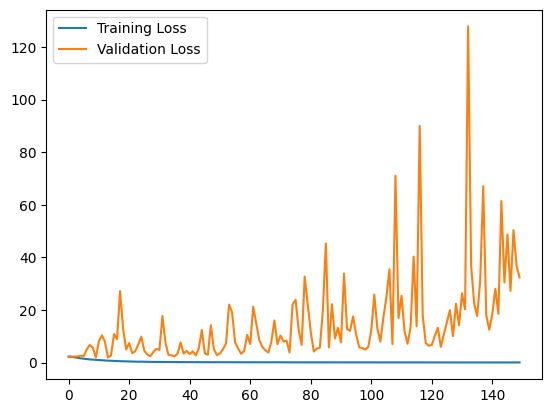

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
import keras
zcr_model = keras.models.load_model(save_path+"/{}_model_.keras".format(features[0]))
print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0745 - loss: 33.0289
Test Accuracy is  0.08357183635234833


In [ ]:
import tensorflow as tf
import numpy as np

files_path = '/content/drive/MyDrive/processed_data/audd'

features = ['melspectrogram', 'mfcc', 'zero_crossing_rate']

x_train = np.load(files_path+"/x_{}_train.npy".format(features[1]), allow_pickle=True)
y_train = np.load(files_path+"/y_{}_train.npy".format(features[1]), allow_pickle=True)

x_test = np.load(files_path+"/x_{}_test.npy".format(features[1]),allow_pickle=True)
y_test = np.load(files_path+"/y_{}_test.npy".format(features[1]),allow_pickle=True)

In [ ]:
print(np.unique(y_mfcc))

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y = label_as_binary.fit_transform(y_train)
test_y = label_as_binary.fit_transform(y_test)

In [ ]:
save_path = '/content/drive/MyDrive/audd saved files/models'


from tensorflow.keras.callbacks import ModelCheckpoint
cnn_model = GetCNN()
print(cnn_model.summary())
cnn_model.compile(loss  = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
callbacks = ModelCheckpoint(save_path+"/mfcc_model_.keras", monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True,
                                    verbose=1)

print("X train shape = ",x_train.shape)
print("y train shape = ",train_y.shape)

history = cnn_model.fit(x_train, train_y, batch_size=64, epochs=50, verbose=1, validation_split=0.1, callbacks=[callbacks])
#import keras
#cnn_model = keras.models.load_model(save_path+"/melspectrogram_model_.h5")
#print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
X train shape =  (6985, 32, 32, 1)
y train shape =  (6985, 10)
Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1293 - loss: 2.4455
Epoch 1: val_accuracy improved from -inf to 0.10587, saving model to /content/drive/MyDrive/audd saved files/models/mfcc_model_.keras
99/99 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.1294 - loss: 2.4442 - val_accuracy: 0.1059 - val_loss: 2.3081
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1612 - loss: 2.2239
Epoch 2: val_accuracy improved from 0.10587 to 0.12303, saving model to /content/drive/MyDrive/audd saved files/models/mfcc_model_.keras
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1612 - loss: 2.2238 - val_accuracy: 0.1230 - val_loss: 2.2579
Epoch 3/50
94/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1755 - loss: 2.1860
Epoch 3: val_accuracy improved from 0.12303 to 0.15021, saving model to /content/drive/MyDrive/audd saved files/models/mfcc_model_.keras
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 

In [ ]:
# # save history
# np.save(save_path+"/{}_history.npy".format(features[2]),history)
# print(mfcc_history['accuracy'])

In [ ]:
import keras
cnn_model = keras.models.load_model(save_path+"/mfcc_model_.keras")
print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4122 - loss: 1.6313
Test Accuracy is  0.4132799208164215


In [ ]:
import keras
zcr_model = keras.models.load_model(save_path+"/{}_model_.keras".format(features[0]))
print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4122 - loss: 1.6313
Test Accuracy is  0.4132799208164215


In [ ]:
import tensorflow as tf
import numpy as np

files_path = '/content/drive/MyDrive/processed_data/audd'

features = ['melspectrogram', 'mfcc', 'zero_crossing_rate']

x_train = np.load(files_path+"/x_{}_train.npy".format(features[2]), allow_pickle=True)
y_train = np.load(files_path+"/y_{}_train.npy".format(features[2]), allow_pickle=True)

x_test = np.load(files_path+"/x_{}_test.npy".format(features[1]),allow_pickle=True)
y_test = np.load(files_path+"/y_{}_test.npy".format(features[1]),allow_pickle=True)

In [ ]:
print(np.unique(y_mfcc))

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
x_train =x_train.reshape((x_train.shape[0],32,32,1))
x_test =x_test.reshape((x_test.shape[0],32,32,1))

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_as_binary = LabelBinarizer()
train_y = label_as_binary.fit_transform(y_train)
test_y = label_as_binary.fit_transform(y_test)

In [ ]:
save_path = '/content/drive/MyDrive/audd saved files/models'


from tensorflow.keras.callbacks import ModelCheckpoint
cnn_model = GetCNN()
print(cnn_model.summary())
cnn_model.compile(loss  = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01))
callbacks = ModelCheckpoint(save_path+"/zero_crossing_rate_model_.keras", monitor='val_accuracy',
                                    mode='max',
                                    save_best_only=True,
                                    verbose=1)

print("X train shape = ",x_train.shape)
print("y train shape = ",train_y.shape)

history = cnn_model.fit(x_train, train_y, batch_size=64, epochs=50, verbose=1, validation_split=0.1, callbacks=[callbacks])
#import keras
#cnn_model = keras.models.load_model(save_path+"/melspectrogram_model_.h5")
#print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175,242 (684.54 KB)

 Trainable params: 174,858 (683.04 KB)

 Non-trainable params: 384 (1.50 KB)

None
X train shape =  (6985, 32, 32, 1)
y train shape =  (6985, 10)
Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1090 - loss: 2.4762
Epoch 1: val_accuracy improved from -inf to 0.10730, saving model to /content/drive/MyDrive/audd saved files/models/zero_crossing_rate_model_.keras
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.1090 - loss: 2.4750 - val_accuracy: 0.1073 - val_loss: 2.3038
Epoch 2/50
93/99 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1162 - loss: 2.3024
Epoch 2: val_accuracy did not improve from 0.10730
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1161 - loss: 2.3023 - val_accuracy: 0.1073 - val_loss: 2.3071
Epoch 3/50
88/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1196 - loss: 2.3012
Epoch 3: val_accuracy did not improve from 0.10730
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1197 - loss: 2.3011 - val_accuracy: 0.1073 - val_loss: 2.3068
Epoch 4/50
90/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1228 - loss: 2.299

In [ ]:
# save history
np.save(save_path+"/{}_history.npy".format(features[2]), history)
print(zero_crossing_rate_history['accuracy'])

NameError: name 'zero_crossing_rate_history' is not defined

In [ ]:
import keras
cnn_model = keras.models.load_model(save_path+"/zero_crossing_rate_model_.keras")
print("Test Accuracy is ", cnn_model.evaluate(x_test,test_y)[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1037 - loss: 61.1184
Test Accuracy is  0.11104750633239746


In [ ]:
# Load all models
import keras

mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")
mfcc_model = keras.models.load_model(save_path+"/mfcc_model_.keras")
zc_model = keras.models.load_model(save_path+"/zero_crossing_rate_model_.keras")

In [ ]:
# Model Ensembling
from keras.models import Model
from keras import layers

def ensembleModels(models, model_input):
    # collect outputs of models in a list
    model_outputs=[model(model_input) for model in models]
    # averaging outputs
    ensemble_output=layers.average(model_outputs)
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=ensemble_output,    name='ensemble')

    return modelEns

In [ ]:
from keras.layers import Input  # Correct import for Input
from keras.models import Model  # Ensure you have this for model creation

# Assuming ensembleModels is defined elsewhere
models = [mp_model, mfcc_model, zc_model]

model_input = Input(shape=models[0].input_shape[1:])  # c*h*w
modelEns = ensembleModels(models, model_input)  # Assuming this function is implemented
modelEns.summary()

modelEns.save(save_path + "/ensemble_.keras", include_optimizer=True)

Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[5][0],    │
│                           │                        │                │ sequential_9[5][0],    │
│                           │                        │                │ sequential_10[5][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
from keras.models import load_model

# Load the model
model = load_model(save_path + "/ensemble_.keras")

# Compile the model (use the same loss and metrics as during training)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print the model summary
model.summary()

# Evaluate the model
test_accuracy = model.evaluate(x_test, test_y)[1]
print("Test Accuracy is ", test_accuracy)


Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_8 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_9 (Sequential) │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_10             │ (None, 10)             │        175,242 │ input_layer_16[0][0]   │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_5 (Average)       │ (None, 10)             │              0 │ sequential_8[0][0],    │
│                           │                        │                │ sequential_9[0][0],    │
│                           │                        │                │ sequential_10[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 525,726 (2.01 MB)

 Trainable params: 524,574 (2.00 MB)

 Non-trainable params: 1,152 (4.50 KB)

ValueError: Cannot get result() since the metric has not yet been built.

In [ ]:
print("Metrics:", model.metrics_names)  # This should list the metrics


Metrics: ['loss', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'loss', 'compile_metrics', 'compile_metrics']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

def evaluateAll(model, x_test, test_y):
  label_as_binary = LabelBinarizer()
  test_y = label_as_binary.fit_transform(test_y)
  return model.evaluate(x_test,test_y)



In [ ]:
#Test data
import keras

path = '/content/drive/MyDrive/processed_data/audd'

x_test = np.load(path+"/x_melspectrogram_test.npy",allow_pickle=True)
y_test = np.load(path+"/y_melspectrogram_test.npy",allow_pickle=True)


mp_model = keras.models.load_model(save_path+"/melspectrogram_model_.keras")

model_result = evaluateAll(mp_model, x_test, y_test)
print(model_result)
print("model history ", mp_model.history)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1075 - loss: 2.2746
[2.26497220993042, 0.11619919538497925]
model history  <keras.src.callbacks.history.History object at 0x79556847a3b0>
